In [13]:
import sys
import os
script_dir = os.path.dirname(os.path.realpath('__file__'))
parent_dir = os.path.dirname(script_dir)
sys.path.insert(0, parent_dir)

import cnn_functions
import models
import gradcam
import pickle
from sklearn.model_selection import train_test_split
import torch
from torchvision import transforms
from torch.utils.data import Subset, DataLoader
from torch.utils.tensorboard import SummaryWriter

# Binary output

In [2]:
# Use the GPU instead of the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Define the label map
labels_map = {
    0: "REAL",
    1: "FAKE"
}

# Compose the transform that will be applied to the data
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor()
])

# 100k samples for training
train_ds = cnn_functions.BinaryCIFAKE(img_dir=os.path.join(script_dir, '../../dataset/train'), transform=transform)

# 10k samples for validation and 10k samples for testing
val_test_ds= cnn_functions.BinaryCIFAKE(img_dir=os.path.join(script_dir, '../../dataset/test'), transform=transform)
idx_val, idx_test = train_test_split(
    range(len(val_test_ds)),
    test_size=0.5,  # 50-50 split
    stratify=val_test_ds.img_labels, # Uniform class distribution
    random_state=0
)
validation_ds = Subset(val_test_ds, idx_val)
test_ds = Subset(val_test_ds, idx_test)

cuda


/home/scardovi/ai-generated-image-detection/detection/lib/python3.10/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU1 NVIDIA GeForce GT 710 which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))




 - untrained_binary_lr1e-02_batch32
Epoch 1; Train err = 10.78%; Val err = 11.47%; Loss: 0.4090
Epoch 2; Train err = 9.92%; Val err = 10.64%; Loss: 0.2231
Epoch 3; Train err = 8.94%; Val err = 10.20%; Loss: 0.1788
Epoch 4; Train err = 4.61%; Val err = 6.07%; Loss: 0.1577
Epoch 5; Train err = 5.60%; Val err = 7.10%; Loss: 0.1400
Epoch 10; Train err = 9.79%; Val err = 11.66%; Loss: 0.0838
Epoch 15; Train err = 3.00%; Val err = 6.58%; Loss: 0.0536
Epoch 20; Train err = 0.98%; Val err = 5.68%; Loss: 0.0374
Epoch 25; Train err = 1.32%; Val err = 5.87%; Loss: 0.0322
Epoch 29; Train err = 1.68%; Val err = 6.12%; Loss: 0.0269
Stopping training...


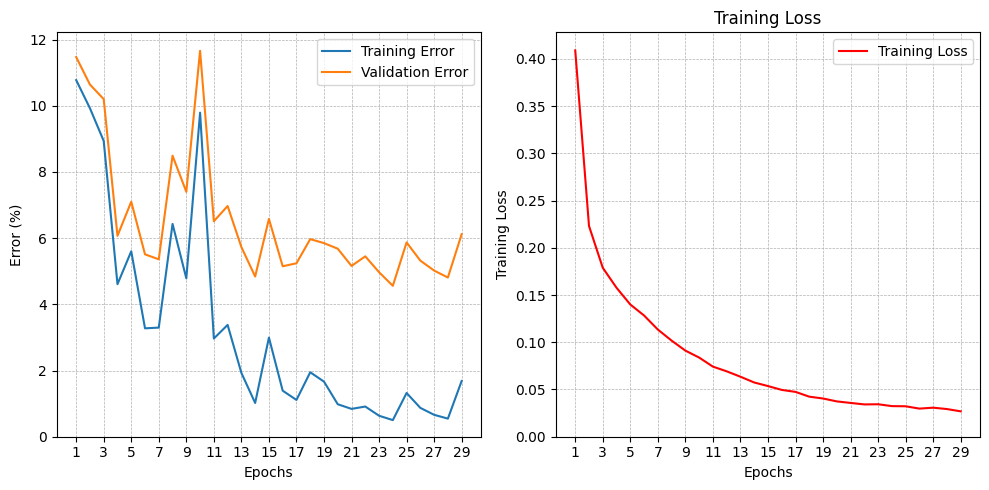



 - untrained_binary_lr1e-02_batch512
Epoch 1; Train err = 12.62%; Val err = 13.42%; Loss: 0.3492
Epoch 2; Train err = 13.63%; Val err = 14.30%; Loss: 0.2053
Epoch 3; Train err = 11.47%; Val err = 13.22%; Loss: 0.1631
Epoch 4; Train err = 12.87%; Val err = 13.87%; Loss: 0.1321
Epoch 5; Train err = 6.96%; Val err = 9.64%; Loss: 0.1113
Epoch 10; Train err = 24.49%; Val err = 25.51%; Loss: 0.0408
Epoch 15; Train err = 1.19%; Val err = 6.08%; Loss: 0.0153
Epoch 20; Train err = 0.94%; Val err = 6.38%; Loss: 0.0128
Epoch 22; Train err = 1.70%; Val err = 7.20%; Loss: 0.0077
Stopping training...


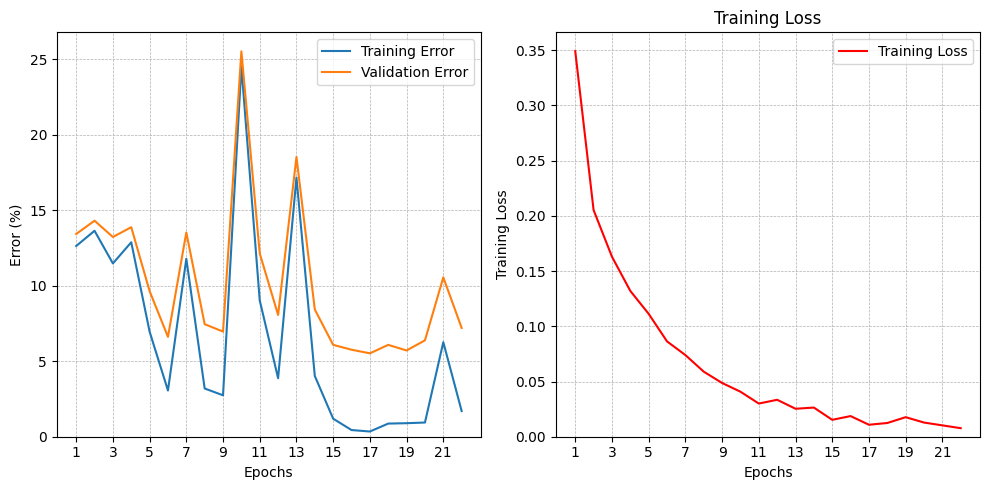



 - untrained_binary_lr1e-02_batch1024
Epoch 1; Train err = 12.46%; Val err = 12.98%; Loss: 0.4005
Epoch 2; Train err = 13.77%; Val err = 14.36%; Loss: 0.2385
Epoch 3; Train err = 12.33%; Val err = 14.26%; Loss: 0.1873
Epoch 4; Train err = 7.38%; Val err = 9.58%; Loss: 0.1482
Epoch 5; Train err = 16.76%; Val err = 17.59%; Loss: 0.1184
Epoch 10; Train err = 1.75%; Val err = 7.62%; Loss: 0.0294
Epoch 15; Train err = 3.78%; Val err = 9.01%; Loss: 0.0108
Epoch 20; Train err = 0.30%; Val err = 6.35%; Loss: 0.0069
Epoch 25; Train err = 0.62%; Val err = 6.92%; Loss: 0.0067
Epoch 25; Train err = 0.62%; Val err = 6.92%; Loss: 0.0067
Stopping training...


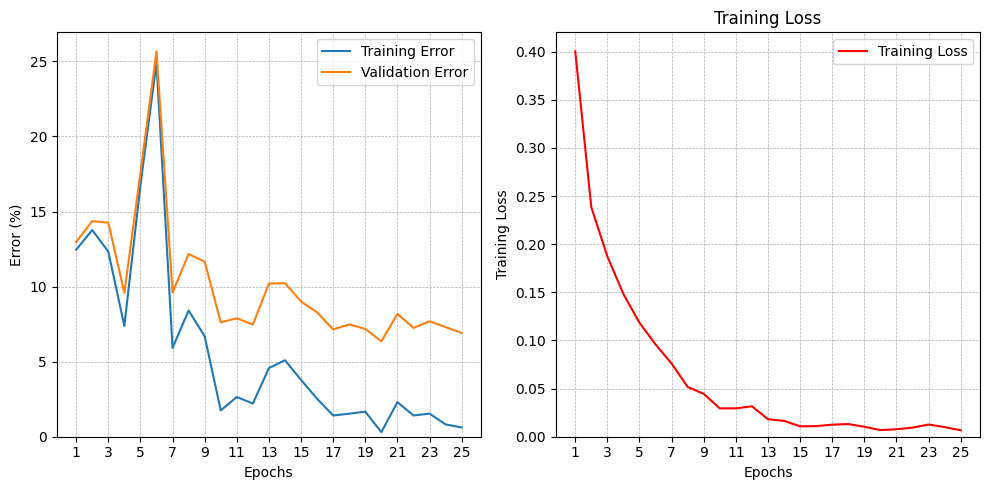



 - untrained_binary_lr1e-03_batch32
Epoch 1; Train err = 19.06%; Val err = 19.21%; Loss: 0.3466
Epoch 2; Train err = 6.81%; Val err = 7.83%; Loss: 0.2244
Epoch 3; Train err = 6.19%; Val err = 7.85%; Loss: 0.1830
Epoch 4; Train err = 8.46%; Val err = 9.94%; Loss: 0.1557
Epoch 5; Train err = 3.21%; Val err = 5.67%; Loss: 0.1348
Epoch 10; Train err = 2.91%; Val err = 6.68%; Loss: 0.0677
Epoch 15; Train err = 0.54%; Val err = 5.24%; Loss: 0.0376
Epoch 20; Train err = 0.30%; Val err = 5.22%; Loss: 0.0239
Epoch 22; Train err = 0.31%; Val err = 5.06%; Loss: 0.0183
Stopping training...


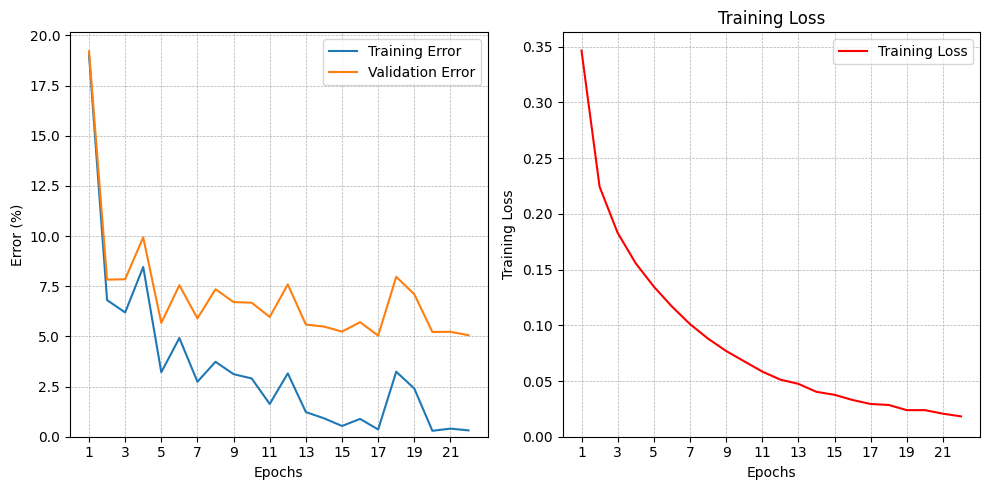



 - untrained_binary_lr1e-03_batch512
Epoch 1; Train err = 16.44%; Val err = 17.02%; Loss: 0.4456
Epoch 2; Train err = 19.84%; Val err = 19.73%; Loss: 0.2999
Epoch 3; Train err = 12.22%; Val err = 12.97%; Loss: 0.2460
Epoch 4; Train err = 14.79%; Val err = 15.51%; Loss: 0.2098
Epoch 5; Train err = 9.30%; Val err = 10.71%; Loss: 0.1835
Epoch 10; Train err = 5.19%; Val err = 8.95%; Loss: 0.0928
Epoch 15; Train err = 4.44%; Val err = 9.99%; Loss: 0.0220
Epoch 20; Train err = 0.13%; Val err = 7.58%; Loss: 0.0036
Epoch 25; Train err = 0.01%; Val err = 7.55%; Loss: 0.0011
Epoch 29; Train err = 0.00%; Val err = 7.64%; Loss: 0.0006
Stopping training...


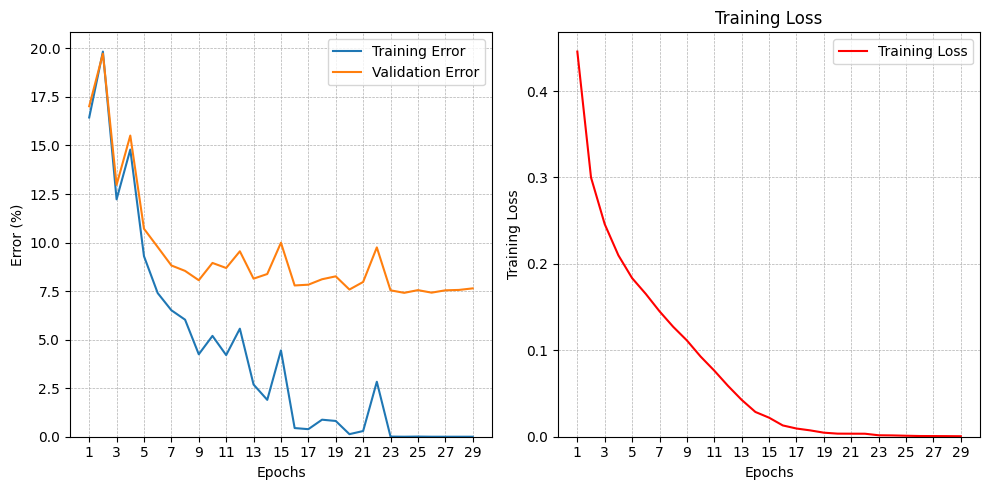



 - untrained_binary_lr1e-03_batch1024
Epoch 1; Train err = 18.79%; Val err = 19.46%; Loss: 0.4971
Epoch 2; Train err = 15.37%; Val err = 15.98%; Loss: 0.3631
Epoch 3; Train err = 12.82%; Val err = 14.00%; Loss: 0.3046
Epoch 4; Train err = 10.58%; Val err = 11.69%; Loss: 0.2630
Epoch 5; Train err = 9.74%; Val err = 10.75%; Loss: 0.2326
Epoch 10; Train err = 11.77%; Val err = 13.89%; Loss: 0.1472
Epoch 15; Train err = 5.79%; Val err = 10.28%; Loss: 0.0723
Epoch 20; Train err = 0.88%; Val err = 8.99%; Loss: 0.0184
Epoch 24; Train err = 1.08%; Val err = 9.63%; Loss: 0.0052
Stopping training...


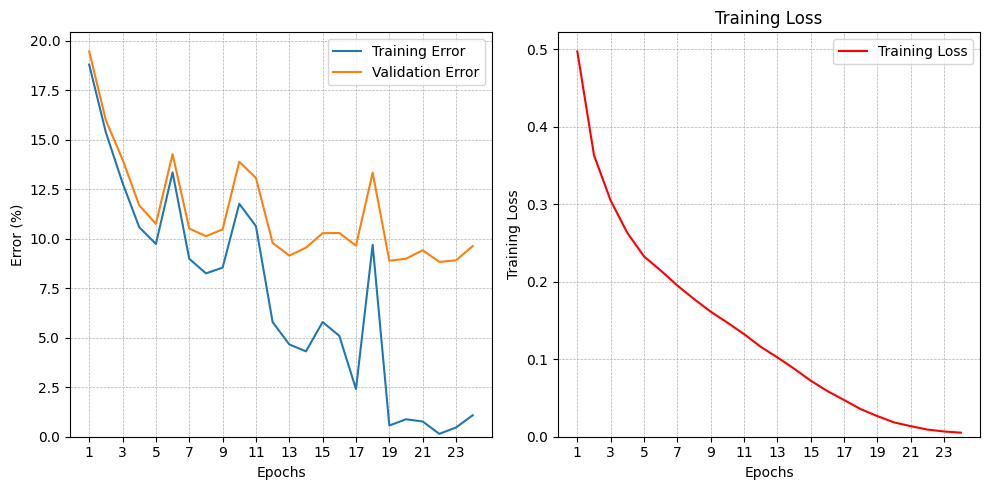

In [3]:
model_init_function = models.untrained_binary
epochs = 50
learning_rates = [0.01, 0.001]
batch_sizes = [32, 512, 1024]

min_epochs = 15
stopping_patience = 5
val_batch_size = 1000
val_dl = DataLoader(validation_ds, batch_size=val_batch_size, num_workers=6, prefetch_factor=6, pin_memory=True)

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=6, prefetch_factor=6, pin_memory=True)

        # Initialize the model
        model = model_init_function()
        model = model.to(device)
        model_name = f"{model_init_function.__name__}_lr{lr:.0e}_batch{batch_size}"
        print("\n\n - " + model_name)
        writer = SummaryWriter('logs/'+model_name)

        # Train the model
        train_err, val_err, train_loss = cnn_functions.train_network(model, device, lr, epochs, train_dl, val_dl, writer=writer, min_epochs=min_epochs, stopping_patience=stopping_patience)
        cnn_functions.plot_training_stats(train_err, val_err, train_loss)
        model_name += f"_epochs{len(train_err)}"
        writer.close()
        
        # Save the progress
        torch.save(model.state_dict(), './weights/' + model_name + '.pth')
        stats_dict = {
            'train_err': train_err,
            'val_err': val_err,
            'train_loss': train_loss
        }
        with open('./stats/' + model_name + '.pkl', 'wb') as f:
            pickle.dump(stats_dict, f)



 - untrained_binary_1hidden_lr1e-03_batch32
Epoch 1; Train err = 10.39%; Val err = 11.11%; Loss: 0.3649
Epoch 2; Train err = 19.45%; Val err = 19.67%; Loss: 0.2381
Epoch 3; Train err = 6.20%; Val err = 7.61%; Loss: 0.1951
Epoch 4; Train err = 5.56%; Val err = 7.17%; Loss: 0.1678
Epoch 5; Train err = 6.00%; Val err = 7.79%; Loss: 0.1462
Epoch 10; Train err = 4.98%; Val err = 8.49%; Loss: 0.0767
Epoch 15; Train err = 1.59%; Val err = 6.63%; Loss: 0.0444
Epoch 20; Train err = 0.29%; Val err = 5.06%; Loss: 0.0283
Epoch 25; Train err = 0.37%; Val err = 5.37%; Loss: 0.0200
Epoch 25; Train err = 0.37%; Val err = 5.37%; Loss: 0.0200
Stopping training...


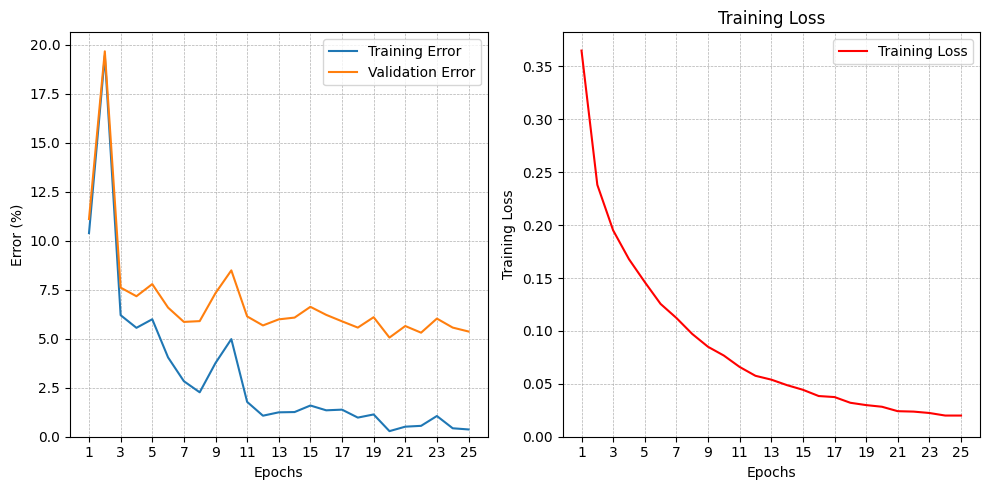



 - untrained_binary_1hidden_lr1e-03_batch512
Epoch 1; Train err = 19.04%; Val err = 19.22%; Loss: 0.5250
Epoch 2; Train err = 14.23%; Val err = 14.30%; Loss: 0.3469
Epoch 3; Train err = 17.36%; Val err = 17.75%; Loss: 0.2757
Epoch 4; Train err = 12.79%; Val err = 12.77%; Loss: 0.2346
Epoch 5; Train err = 8.23%; Val err = 8.78%; Loss: 0.2120
Epoch 10; Train err = 6.70%; Val err = 8.69%; Loss: 0.1406
Epoch 15; Train err = 3.14%; Val err = 7.73%; Loss: 0.0753
Epoch 20; Train err = 1.70%; Val err = 7.72%; Loss: 0.0329
Epoch 25; Train err = 4.71%; Val err = 9.59%; Loss: 0.0162
Epoch 28; Train err = 1.36%; Val err = 8.37%; Loss: 0.0085
Stopping training...


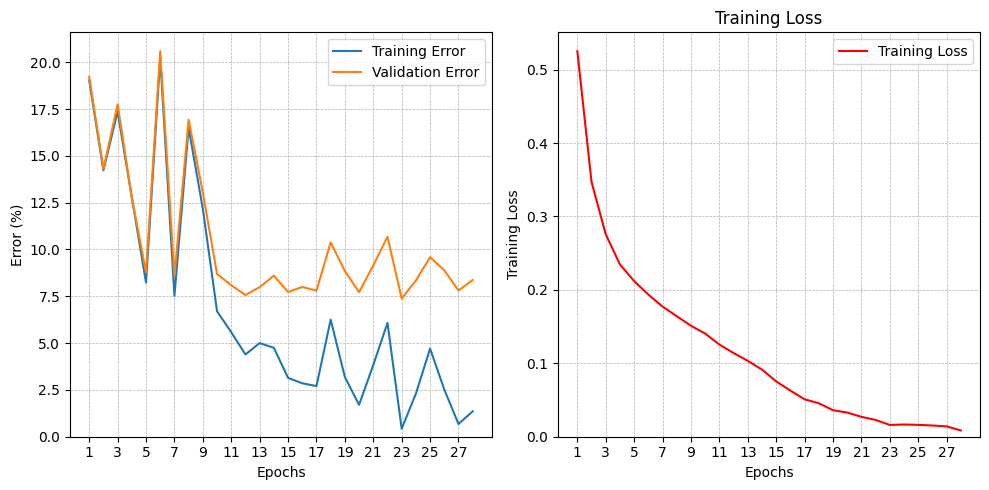



 - untrained_binary_1hidden_lr1e-03_batch1024
Epoch 1; Train err = 22.33%; Val err = 23.07%; Loss: 0.5872
Epoch 2; Train err = 17.15%; Val err = 17.38%; Loss: 0.4343
Epoch 3; Train err = 14.44%; Val err = 14.55%; Loss: 0.3555
Epoch 4; Train err = 17.64%; Val err = 18.59%; Loss: 0.3001
Epoch 5; Train err = 11.30%; Val err = 11.83%; Loss: 0.2687
Epoch 10; Train err = 8.68%; Val err = 10.16%; Loss: 0.1848
Epoch 15; Train err = 8.57%; Val err = 10.73%; Loss: 0.1405
Epoch 20; Train err = 6.22%; Val err = 9.58%; Loss: 0.0938
Epoch 22; Train err = 5.65%; Val err = 9.49%; Loss: 0.0766
Stopping training...


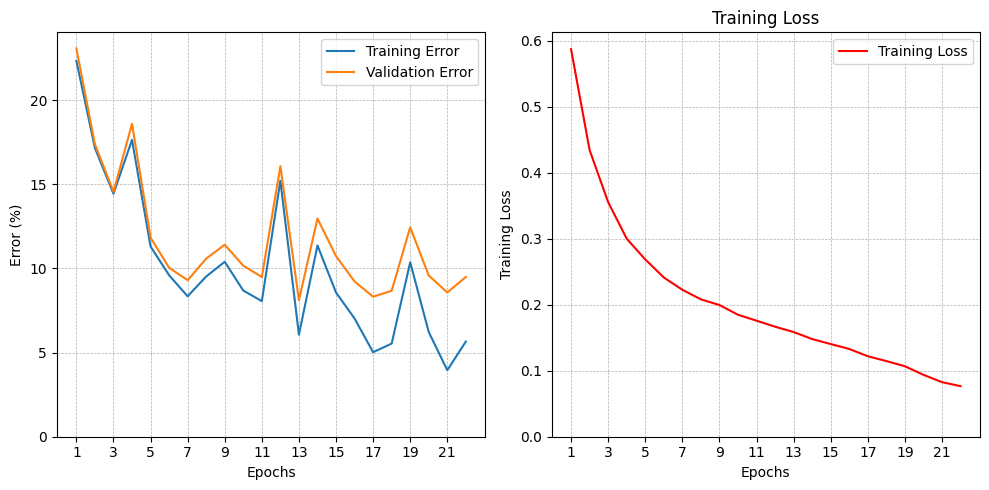



 - untrained_binary_1hidden_lr1e-04_batch32
Epoch 1; Train err = 14.75%; Val err = 15.19%; Loss: 0.4842
Epoch 2; Train err = 11.99%; Val err = 12.31%; Loss: 0.3268
Epoch 3; Train err = 13.13%; Val err = 13.56%; Loss: 0.2748
Epoch 4; Train err = 7.55%; Val err = 8.69%; Loss: 0.2431
Epoch 5; Train err = 9.32%; Val err = 10.55%; Loss: 0.2219
Epoch 10; Train err = 4.26%; Val err = 6.80%; Loss: 0.1611
Epoch 15; Train err = 3.66%; Val err = 7.91%; Loss: 0.1161
Epoch 20; Train err = 1.08%; Val err = 6.31%; Loss: 0.0770
Epoch 25; Train err = 0.42%; Val err = 6.35%; Loss: 0.0522
Epoch 25; Train err = 0.42%; Val err = 6.35%; Loss: 0.0522
Stopping training...


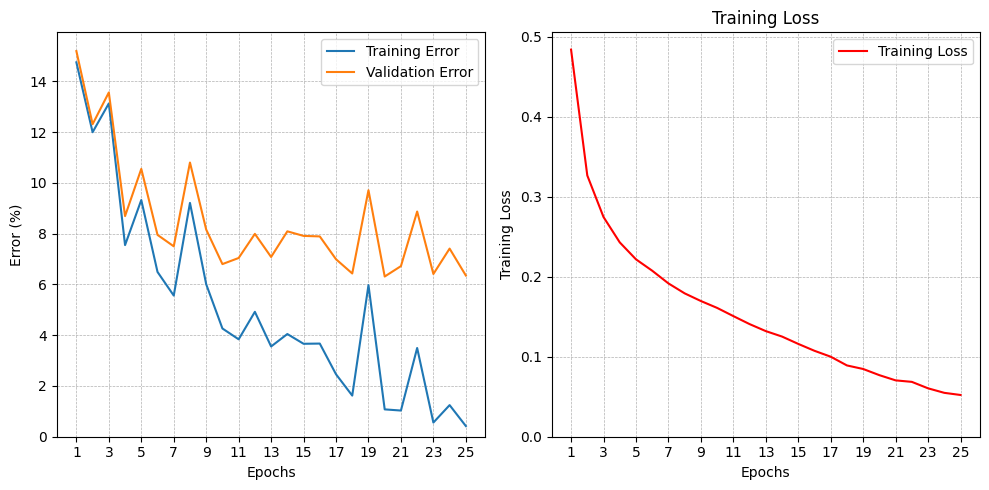



 - untrained_binary_1hidden_lr1e-04_batch512
Epoch 1; Train err = 31.91%; Val err = 32.44%; Loss: 0.6739
Epoch 2; Train err = 27.41%; Val err = 27.80%; Loss: 0.6001
Epoch 3; Train err = 24.27%; Val err = 24.72%; Loss: 0.5520
Epoch 4; Train err = 21.36%; Val err = 22.10%; Loss: 0.5102
Epoch 5; Train err = 19.40%; Val err = 20.13%; Loss: 0.4726
Epoch 10; Train err = 16.17%; Val err = 17.19%; Loss: 0.3324
Epoch 15; Train err = 13.91%; Val err = 15.22%; Loss: 0.2696
Epoch 20; Train err = 9.71%; Val err = 11.02%; Loss: 0.2371
Epoch 25; Train err = 9.54%; Val err = 11.02%; Loss: 0.2139
Epoch 30; Train err = 6.90%; Val err = 8.71%; Loss: 0.1951
Epoch 35; Train err = 7.60%; Val err = 9.40%; Loss: 0.1789
Epoch 35; Train err = 7.60%; Val err = 9.40%; Loss: 0.1789
Stopping training...


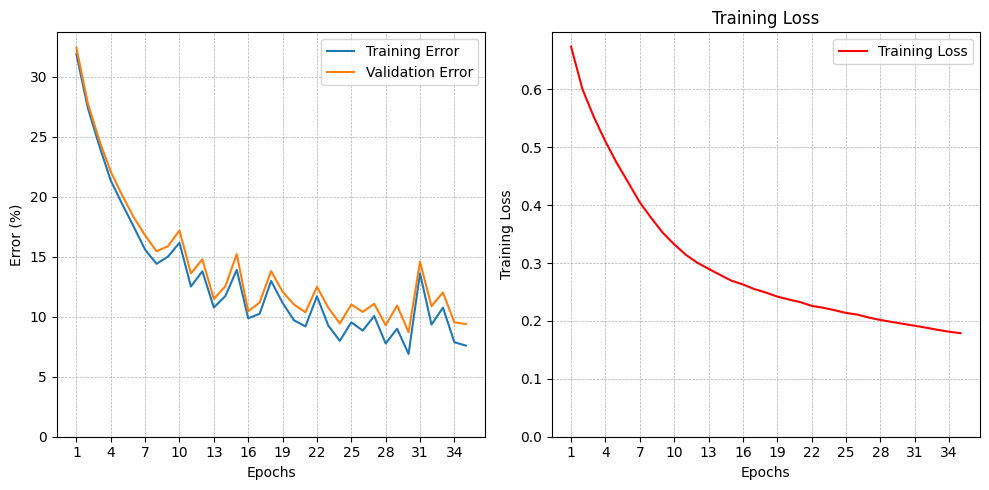



 - untrained_binary_1hidden_lr1e-04_batch1024
Epoch 1; Train err = 40.43%; Val err = 41.17%; Loss: 0.7049
Epoch 2; Train err = 34.75%; Val err = 35.19%; Loss: 0.6664
Epoch 3; Train err = 31.21%; Val err = 31.75%; Loss: 0.6397
Epoch 4; Train err = 28.61%; Val err = 29.54%; Loss: 0.6115
Epoch 5; Train err = 26.29%; Val err = 27.53%; Loss: 0.5845
Epoch 10; Train err = 19.53%; Val err = 20.35%; Loss: 0.4659
Epoch 15; Train err = 16.07%; Val err = 17.38%; Loss: 0.3938
Epoch 20; Train err = 13.75%; Val err = 15.10%; Loss: 0.3468
Epoch 25; Train err = 12.28%; Val err = 13.72%; Loss: 0.3112
Epoch 30; Train err = 10.79%; Val err = 12.12%; Loss: 0.2813
Epoch 35; Train err = 9.80%; Val err = 11.71%; Loss: 0.2593
Epoch 40; Train err = 8.91%; Val err = 11.04%; Loss: 0.2431
Epoch 45; Train err = 8.37%; Val err = 10.59%; Loss: 0.2272
Epoch 50; Train err = 9.19%; Val err = 10.95%; Loss: 0.2136
Epoch 50; Train err = 9.19%; Val err = 10.95%; Loss: 0.2136
Stopping training...


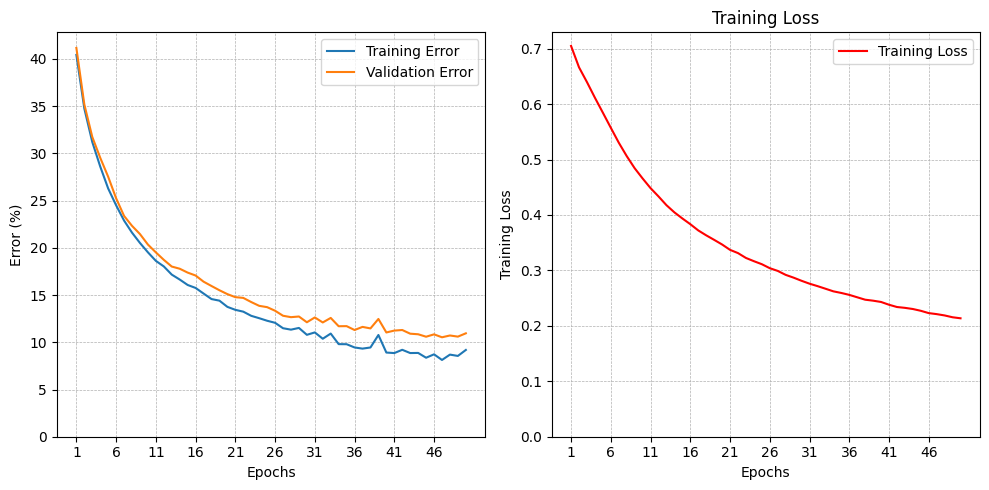

In [4]:
model_init_function = models.untrained_binary_1hidden
epochs = 50
learning_rates = [0.001, 0.0001]
batch_sizes = [32, 512, 1024]

min_epochs = 15
stopping_patience = 5
val_batch_size = 1000
val_dl = DataLoader(validation_ds, batch_size=val_batch_size, num_workers=6, prefetch_factor=6, pin_memory=True)

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=6, prefetch_factor=6, pin_memory=True)

        # Initialize the model
        model = model_init_function()
        model = model.to(device)
        model_name = f"{model_init_function.__name__}_lr{lr:.0e}_batch{batch_size}"
        print("\n\n - " + model_name)
        writer = SummaryWriter('logs/'+model_name)

        # Train the model
        train_err, val_err, train_loss = cnn_functions.train_network(model, device, lr, epochs, train_dl, val_dl, writer=writer, min_epochs=min_epochs, stopping_patience=stopping_patience)
        cnn_functions.plot_training_stats(train_err, val_err, train_loss)
        model_name += f"_epochs{len(train_err)}"
        writer.close()
        
        # Save the progress
        torch.save(model.state_dict(), './weights/' + model_name + '.pth')
        stats_dict = {
            'train_err': train_err,
            'val_err': val_err,
            'train_loss': train_loss
        }
        with open('./stats/' + model_name + '.pkl', 'wb') as f:
            pickle.dump(stats_dict, f)

### Confusion matrix

Test accuracy: 93.44%


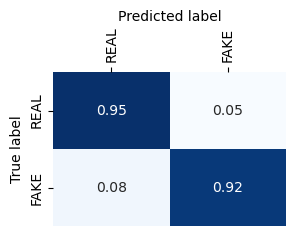

In [3]:
model_init_function = models.binary_finetuning
weights_filename = 'untrained_binary_lr-05_batch4_epochs30.pth'
class_names = [labels_map[c] for c in labels_map]
cm_figsize = (3, 2)

# Load the model and the test data
model = model_init_function()
model.load_state_dict(torch.load(os.path.join(script_dir, './weights', weights_filename)))
test_batch_size = 1000
test_loader = DataLoader(test_ds, batch_size=test_batch_size, shuffle=True)

# Plot the confusion matrix
confusion_matrix, test_accuracy = cnn_functions.make_confusion_matrix(device, model, test_loader, len(class_names))
print(f'Test accuracy: {test_accuracy*100:.2f}%')
cnn_functions.plot_confusion_matrix(confusion_matrix, class_names, cm_figsize)

# Multiclass model

In [4]:
# Use the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

labels_map = {
    0: "REAL Truck",
    1: "REAL Car",
    2: "REAL Bird",
    3: "REAL Cat",
    4: "REAL Deer",
    5: "REAL Dog",
    6: "REAL Frog",
    7: "REAL Horse",
    8: "REAL Ship",
    9: "REAL Plane",
    10: "FAKE Truck",
    11: "FAKE Car",
    12: "FAKE Bird",
    13: "FAKE Cat",
    14: "FAKE Deer",
    15: "FAKE Dog",
    16: "FAKE Frog",
    17: "FAKE Horse",
    18: "FAKE Ship",
    19: "FAKE Plane"
}

# Compose the transform that will be applied to the data
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor()
])

# 100k samples for training
train_ds = cnn_functions.MulticlassCIFAKE(img_dir=os.path.join(script_dir, '../../dataset/train'), transform=transform)

# 10k samples for validation and 10k samples for testing
val_test_ds= cnn_functions.MulticlassCIFAKE(img_dir=os.path.join(script_dir, '../../dataset/test'), transform=transform)
idx_val, idx_test = train_test_split(
    range(len(val_test_ds)),
    test_size=0.5,  # 50-50 split
    stratify=val_test_ds.img_labels, # Uniform class distribution
    random_state=0
)
validation_ds = Subset(val_test_ds, idx_val)
test_ds = Subset(val_test_ds, idx_test)

cuda




 - untrained_multiclass_lr1e-03_batch32
Epoch 1; Train err = 41.41%; Val err = 43.35%; Loss: 1.4597
Epoch 2; Train err = 28.26%; Val err = 32.23%; Loss: 0.9850
Epoch 3; Train err = 22.36%; Val err = 27.81%; Loss: 0.8005
Epoch 4; Train err = 17.48%; Val err = 25.43%; Loss: 0.6762
Epoch 5; Train err = 16.86%; Val err = 26.11%; Loss: 0.5841
Epoch 10; Train err = 7.28%; Val err = 23.01%; Loss: 0.2926
Epoch 15; Train err = 4.75%; Val err = 24.24%; Loss: 0.1511
Epoch 20; Train err = 1.42%; Val err = 21.70%; Loss: 0.0912
Epoch 25; Train err = 0.74%; Val err = 20.74%; Loss: 0.0569
Epoch 30; Train err = 0.54%; Val err = 20.82%; Loss: 0.0412
Epoch 33; Train err = 0.49%; Val err = 21.16%; Loss: 0.0389
Stopping training...


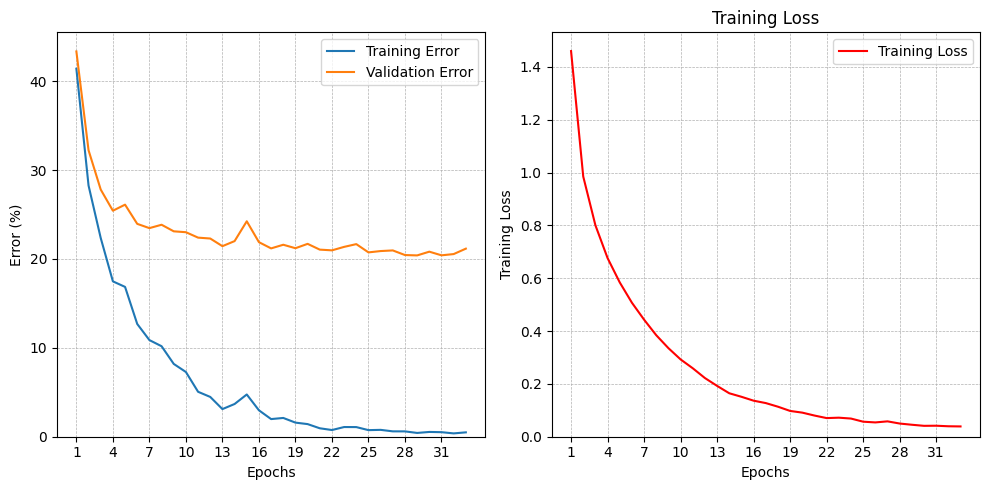



 - untrained_multiclass_lr1e-03_batch512
Epoch 1; Train err = 54.36%; Val err = 54.53%; Loss: 2.0916
Epoch 2; Train err = 46.49%; Val err = 47.00%; Loss: 1.4462
Epoch 3; Train err = 42.14%; Val err = 44.26%; Loss: 1.2200
Epoch 4; Train err = 42.02%; Val err = 44.66%; Loss: 1.0795
Epoch 5; Train err = 36.65%; Val err = 40.15%; Loss: 0.9732
Epoch 10; Train err = 20.57%; Val err = 32.93%; Loss: 0.5979
Epoch 15; Train err = 10.83%; Val err = 33.36%; Loss: 0.3004
Epoch 20; Train err = 1.22%; Val err = 32.09%; Loss: 0.0951
Epoch 22; Train err = 0.38%; Val err = 32.03%; Loss: 0.0513
Stopping training...


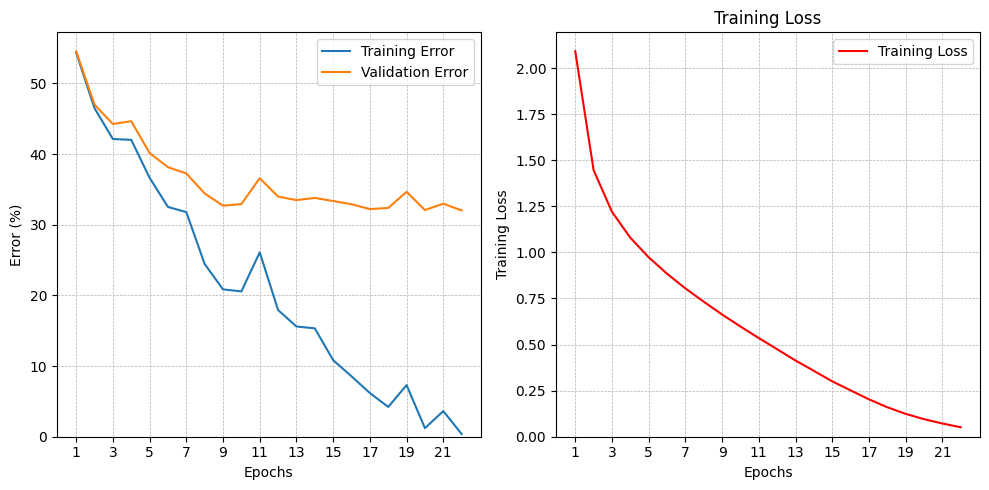



 - untrained_multiclass_lr1e-03_batch1024
Epoch 1; Train err = 61.07%; Val err = 61.32%; Loss: 2.3724
Epoch 2; Train err = 50.03%; Val err = 51.32%; Loss: 1.6789
Epoch 3; Train err = 47.62%; Val err = 49.16%; Loss: 1.4315
Epoch 4; Train err = 44.10%; Val err = 46.32%; Loss: 1.2819
Epoch 5; Train err = 43.06%; Val err = 44.98%; Loss: 1.1738
Epoch 10; Train err = 30.91%; Val err = 37.88%; Loss: 0.8495
Epoch 15; Train err = 22.86%; Val err = 36.01%; Loss: 0.6138
Epoch 20; Train err = 16.31%; Val err = 34.91%; Loss: 0.4033
Epoch 25; Train err = 4.66%; Val err = 34.00%; Loss: 0.2228
Epoch 26; Train err = 4.12%; Val err = 33.80%; Loss: 0.1923
Stopping training...


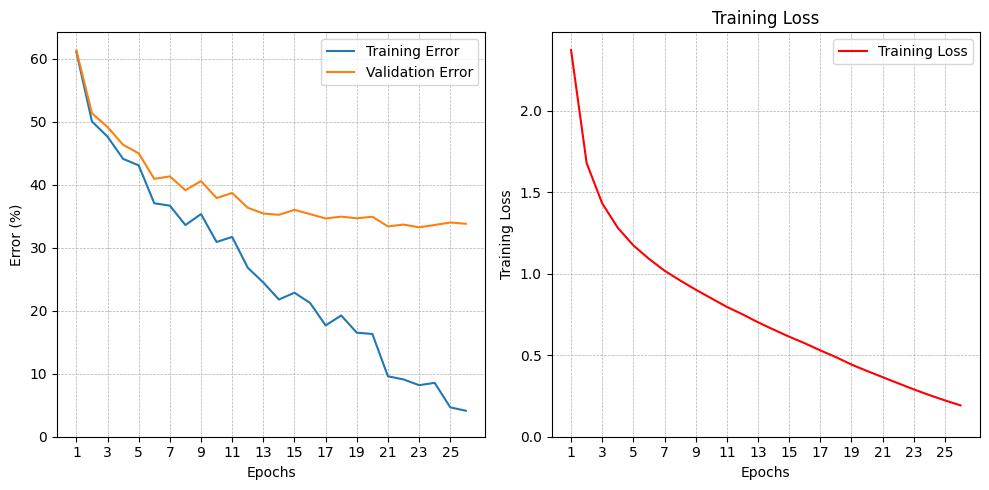



 - untrained_multiclass_lr1e-04_batch32
Epoch 1; Train err = 50.37%; Val err = 51.25%; Loss: 1.9307
Epoch 2; Train err = 39.50%; Val err = 41.89%; Loss: 1.3976
Epoch 3; Train err = 35.77%; Val err = 38.66%; Loss: 1.2047
Epoch 4; Train err = 31.21%; Val err = 35.59%; Loss: 1.0721
Epoch 5; Train err = 27.19%; Val err = 32.97%; Loss: 0.9751
Epoch 10; Train err = 18.92%; Val err = 29.87%; Loss: 0.6656
Epoch 15; Train err = 9.52%; Val err = 28.20%; Loss: 0.4575
Epoch 20; Train err = 5.72%; Val err = 28.56%; Loss: 0.2985
Epoch 25; Train err = 2.26%; Val err = 27.66%; Loss: 0.1889
Epoch 27; Train err = 1.29%; Val err = 27.72%; Loss: 0.1593
Stopping training...


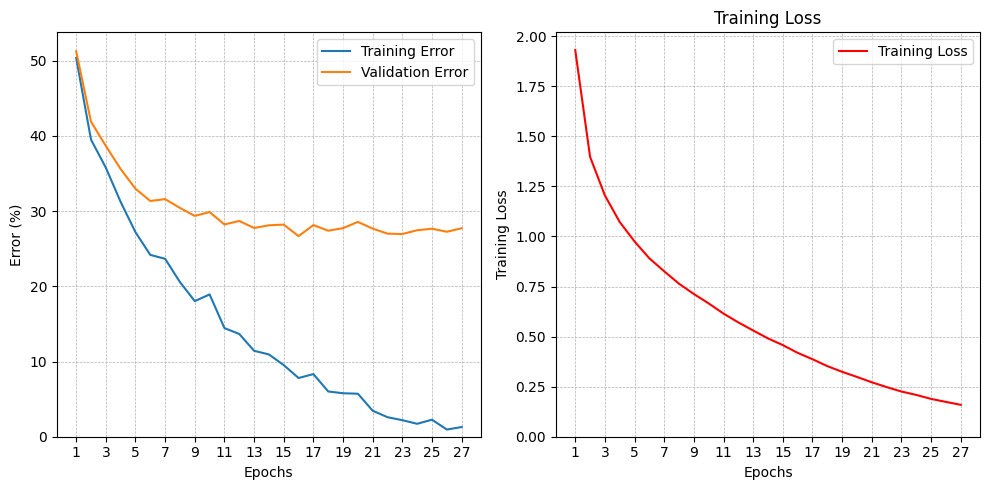



 - untrained_multiclass_lr1e-04_batch512
Epoch 1; Train err = 76.44%; Val err = 76.81%; Loss: 2.8245
Epoch 2; Train err = 69.04%; Val err = 69.05%; Loss: 2.3749
Epoch 3; Train err = 63.38%; Val err = 63.71%; Loss: 2.1282
Epoch 4; Train err = 59.80%; Val err = 60.75%; Loss: 1.9557
Epoch 5; Train err = 56.56%; Val err = 57.70%; Loss: 1.8252
Epoch 10; Train err = 47.07%; Val err = 49.31%; Loss: 1.4652
Epoch 15; Train err = 41.61%; Val err = 45.48%; Loss: 1.2819
Epoch 20; Train err = 38.05%; Val err = 42.84%; Loss: 1.1566
Epoch 25; Train err = 34.56%; Val err = 40.17%; Loss: 1.0603
Epoch 30; Train err = 32.37%; Val err = 39.93%; Loss: 0.9806
Epoch 35; Train err = 29.53%; Val err = 38.08%; Loss: 0.9088
Epoch 38; Train err = 31.16%; Val err = 39.18%; Loss: 0.8688
Stopping training...


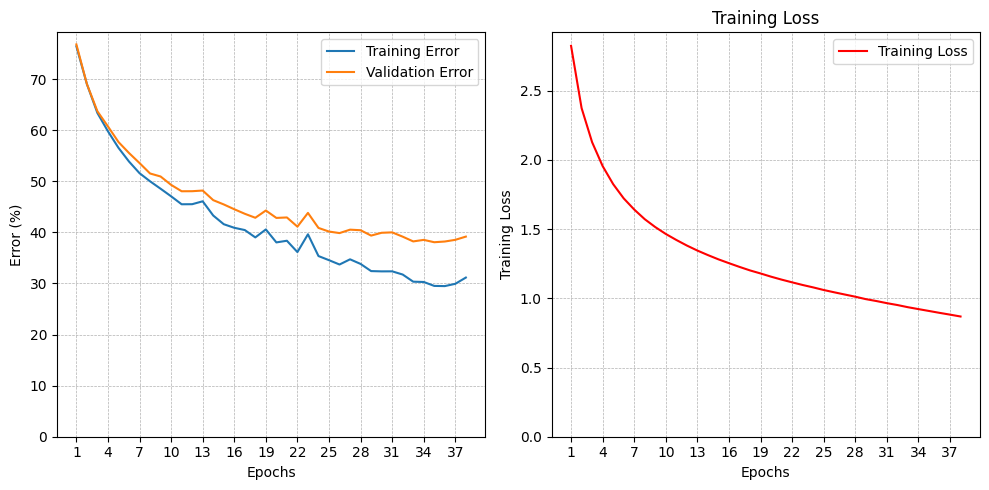



 - untrained_multiclass_lr1e-04_batch1024
Epoch 1; Train err = 83.51%; Val err = 84.30%; Loss: 2.9880
Epoch 2; Train err = 75.89%; Val err = 76.15%; Loss: 2.6412
Epoch 3; Train err = 71.69%; Val err = 72.43%; Loss: 2.4291
Epoch 4; Train err = 68.45%; Val err = 69.32%; Loss: 2.2843
Epoch 5; Train err = 65.73%; Val err = 67.20%; Loss: 2.1738
Epoch 10; Train err = 57.22%; Val err = 59.47%; Loss: 1.8314
Epoch 15; Train err = 51.82%; Val err = 54.74%; Loss: 1.6284
Epoch 20; Train err = 47.64%; Val err = 50.86%; Loss: 1.4831
Epoch 25; Train err = 44.58%; Val err = 48.01%; Loss: 1.3732
Epoch 30; Train err = 41.98%; Val err = 46.32%; Loss: 1.2882
Epoch 35; Train err = 39.80%; Val err = 45.01%; Loss: 1.2195
Epoch 40; Train err = 37.88%; Val err = 43.45%; Loss: 1.1591
Epoch 45; Train err = 36.19%; Val err = 42.53%; Loss: 1.1067
Epoch 50; Train err = 34.66%; Val err = 41.90%; Loss: 1.0596


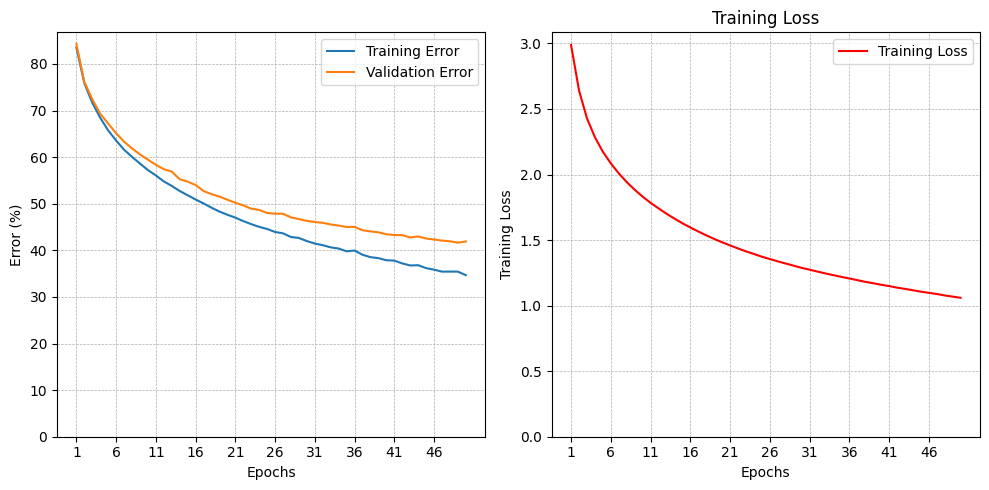

In [6]:
model_init_function = models.untrained_multiclass
epochs = 50
learning_rates = [0.001, 0.0001]
batch_sizes = [32, 512, 1024]

min_epochs = 15
stopping_patience = 5
val_batch_size = 1000
val_dl = DataLoader(validation_ds, batch_size=val_batch_size, num_workers=6, prefetch_factor=6, pin_memory=True)

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=6, prefetch_factor=6, pin_memory=True)

        # Initialize the model
        model = model_init_function()
        model = model.to(device)
        model_name = f"{model_init_function.__name__}_lr{lr:.0e}_batch{batch_size}"
        print("\n\n - " + model_name)
        writer = SummaryWriter('logs/'+model_name)

        # Train the model
        train_err, val_err, train_loss = cnn_functions.train_network(model, device, lr, epochs, train_dl, val_dl, writer=writer, min_epochs=min_epochs, stopping_patience=stopping_patience)
        cnn_functions.plot_training_stats(train_err, val_err, train_loss)
        model_name += f"_epochs{len(train_err)}"
        writer.close()
        
        # Save the progress
        torch.save(model.state_dict(), './weights/' + model_name + '.pth')
        stats_dict = {
            'train_err': train_err,
            'val_err': val_err,
            'train_loss': train_loss
        }
        with open('./stats/' + model_name + '.pkl', 'wb') as f:
            pickle.dump(stats_dict, f)



 - untrained_multiclass_1hidden_lr1e-03_batch32
Epoch 1; Train err = 39.53%; Val err = 40.86%; Loss: 1.7009
Epoch 2; Train err = 29.07%; Val err = 31.70%; Loss: 1.1619
Epoch 3; Train err = 28.04%; Val err = 30.88%; Loss: 0.9622
Epoch 4; Train err = 25.77%; Val err = 30.38%; Loss: 0.8358
Epoch 5; Train err = 19.46%; Val err = 25.95%; Loss: 0.7408
Epoch 10; Train err = 9.03%; Val err = 22.01%; Loss: 0.4458
Epoch 15; Train err = 4.50%; Val err = 20.35%; Loss: 0.2781
Epoch 20; Train err = 2.76%; Val err = 19.97%; Loss: 0.1811
Epoch 25; Train err = 1.33%; Val err = 19.76%; Loss: 0.1226
Epoch 28; Train err = 0.99%; Val err = 19.72%; Loss: 0.0990
Stopping training...


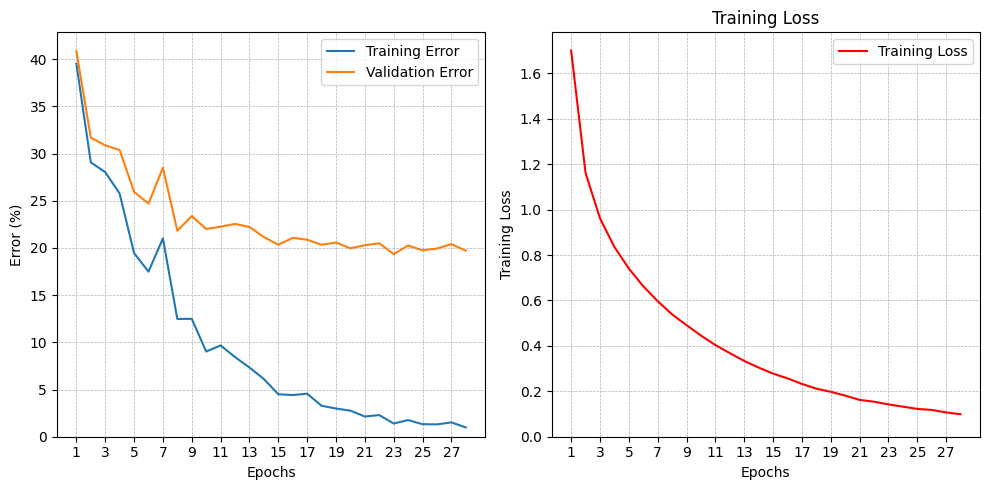



 - untrained_multiclass_1hidden_lr1e-03_batch512
Epoch 1; Train err = 67.58%; Val err = 67.19%; Loss: 2.6697
Epoch 2; Train err = 53.64%; Val err = 54.13%; Loss: 1.9885
Epoch 3; Train err = 46.88%; Val err = 47.97%; Loss: 1.6355
Epoch 4; Train err = 44.30%; Val err = 45.75%; Loss: 1.4269
Epoch 5; Train err = 38.96%; Val err = 40.82%; Loss: 1.2829
Epoch 10; Train err = 27.40%; Val err = 32.97%; Loss: 0.8941
Epoch 15; Train err = 24.66%; Val err = 33.01%; Loss: 0.6613
Epoch 20; Train err = 16.16%; Val err = 30.62%; Loss: 0.4568
Epoch 23; Train err = 10.46%; Val err = 30.34%; Loss: 0.3348
Stopping training...


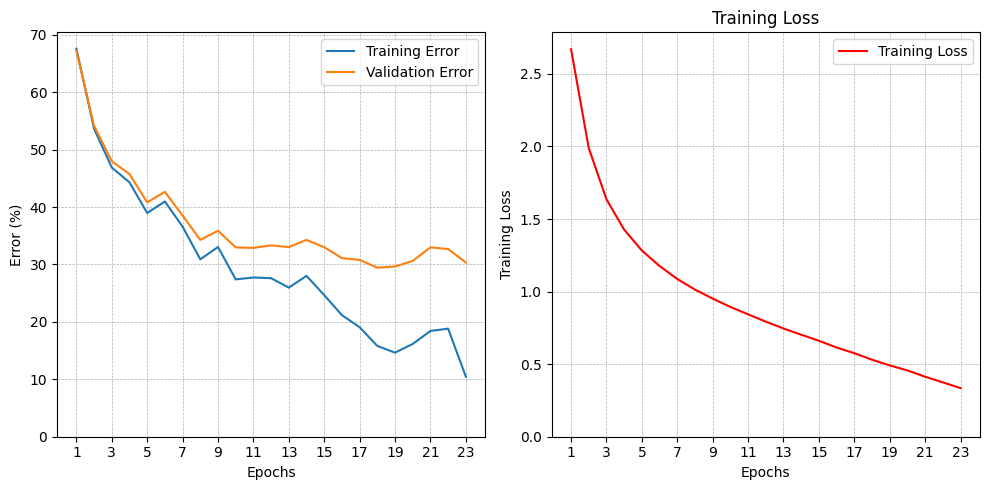



 - untrained_multiclass_1hidden_lr1e-03_batch1024
Epoch 1; Train err = 74.58%; Val err = 74.64%; Loss: 2.8355
Epoch 2; Train err = 63.98%; Val err = 63.67%; Loss: 2.3503
Epoch 3; Train err = 56.74%; Val err = 56.90%; Loss: 2.0193
Epoch 4; Train err = 53.26%; Val err = 53.96%; Loss: 1.8037
Epoch 5; Train err = 49.54%; Val err = 50.55%; Loss: 1.6563
Epoch 10; Train err = 38.30%; Val err = 40.59%; Loss: 1.2066
Epoch 15; Train err = 33.16%; Val err = 37.13%; Loss: 0.9771
Epoch 20; Train err = 26.05%; Val err = 33.23%; Loss: 0.8020
Epoch 25; Train err = 21.19%; Val err = 32.19%; Loss: 0.6506
Epoch 28; Train err = 18.39%; Val err = 32.14%; Loss: 0.5665
Stopping training...


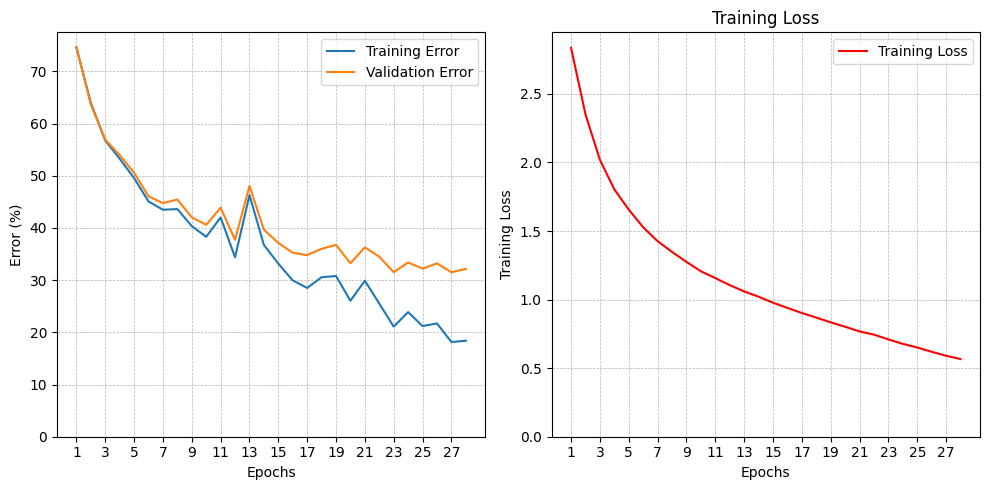



 - untrained_multiclass_1hidden_lr1e-04_batch32
Epoch 1; Train err = 57.82%; Val err = 58.25%; Loss: 2.4565
Epoch 2; Train err = 46.65%; Val err = 47.31%; Loss: 1.7989
Epoch 3; Train err = 39.89%; Val err = 41.33%; Loss: 1.5219
Epoch 4; Train err = 41.96%; Val err = 43.86%; Loss: 1.3576
Epoch 5; Train err = 35.71%; Val err = 37.56%; Loss: 1.2376
Epoch 10; Train err = 23.57%; Val err = 29.92%; Loss: 0.9019
Epoch 15; Train err = 17.62%; Val err = 27.43%; Loss: 0.7026
Epoch 20; Train err = 12.99%; Val err = 26.36%; Loss: 0.5486
Epoch 25; Train err = 7.21%; Val err = 25.09%; Loss: 0.4234
Epoch 29; Train err = 5.56%; Val err = 26.20%; Loss: 0.3385
Stopping training...


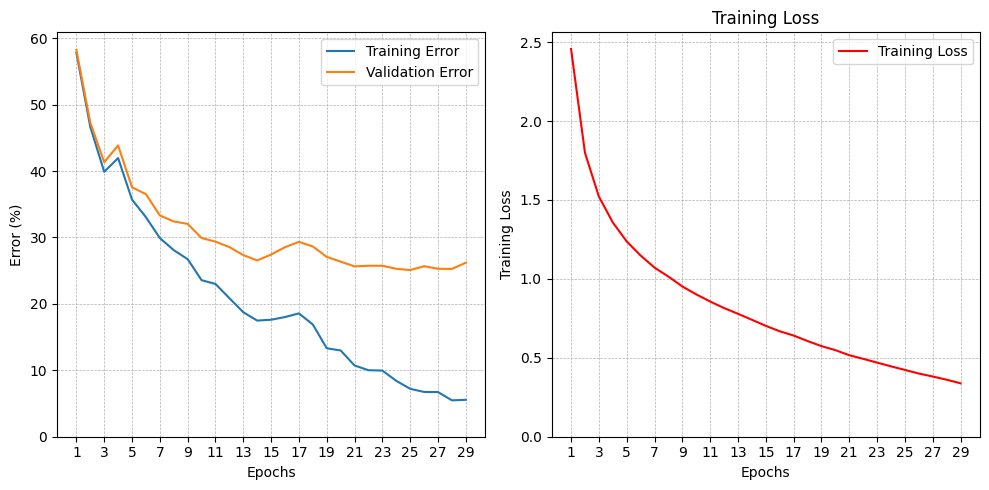



 - untrained_multiclass_1hidden_lr1e-04_batch512
Epoch 1; Train err = 89.10%; Val err = 89.43%; Loss: 3.0234
Epoch 2; Train err = 81.76%; Val err = 81.96%; Loss: 2.9237
Epoch 3; Train err = 76.94%; Val err = 77.39%; Loss: 2.8242
Epoch 4; Train err = 73.93%; Val err = 74.31%; Loss: 2.7103
Epoch 5; Train err = 71.64%; Val err = 72.25%; Loss: 2.5952
Epoch 10; Train err = 62.14%; Val err = 62.67%; Loss: 2.1675
Epoch 15; Train err = 55.17%; Val err = 56.30%; Loss: 1.9087
Epoch 20; Train err = 49.90%; Val err = 51.81%; Loss: 1.7192
Epoch 25; Train err = 45.95%; Val err = 47.98%; Loss: 1.5709
Epoch 30; Train err = 43.49%; Val err = 45.70%; Loss: 1.4563
Epoch 35; Train err = 40.93%; Val err = 43.26%; Loss: 1.3538
Epoch 40; Train err = 38.20%; Val err = 41.12%; Loss: 1.2688
Epoch 45; Train err = 35.30%; Val err = 39.18%; Loss: 1.1979
Epoch 50; Train err = 34.11%; Val err = 38.37%; Loss: 1.1376


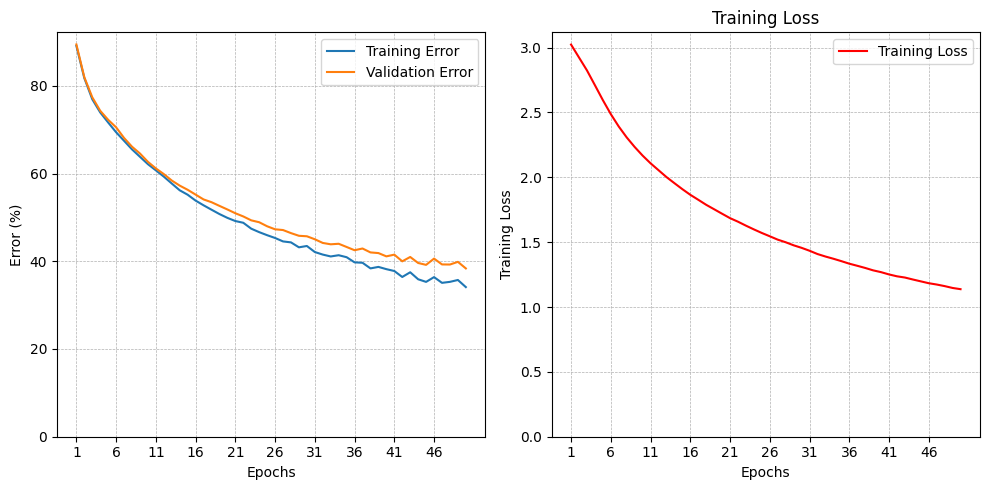



 - untrained_multiclass_1hidden_lr1e-04_batch1024
Epoch 1; Train err = 91.69%; Val err = 91.79%; Loss: 3.0451
Epoch 2; Train err = 88.68%; Val err = 88.84%; Loss: 2.9874
Epoch 3; Train err = 85.49%; Val err = 85.45%; Loss: 2.9411
Epoch 4; Train err = 82.27%; Val err = 82.10%; Loss: 2.8951
Epoch 5; Train err = 79.55%; Val err = 79.96%; Loss: 2.8455
Epoch 10; Train err = 72.02%; Val err = 72.77%; Loss: 2.5439
Epoch 15; Train err = 65.26%; Val err = 65.12%; Loss: 2.2852
Epoch 20; Train err = 60.62%; Val err = 60.81%; Loss: 2.0872
Epoch 25; Train err = 57.00%; Val err = 57.44%; Loss: 1.9489
Epoch 30; Train err = 54.03%; Val err = 54.77%; Loss: 1.8357
Epoch 35; Train err = 51.57%; Val err = 52.61%; Loss: 1.7409
Epoch 40; Train err = 49.13%; Val err = 50.60%; Loss: 1.6591
Epoch 45; Train err = 47.66%; Val err = 49.48%; Loss: 1.5867
Epoch 50; Train err = 45.43%; Val err = 47.26%; Loss: 1.5180


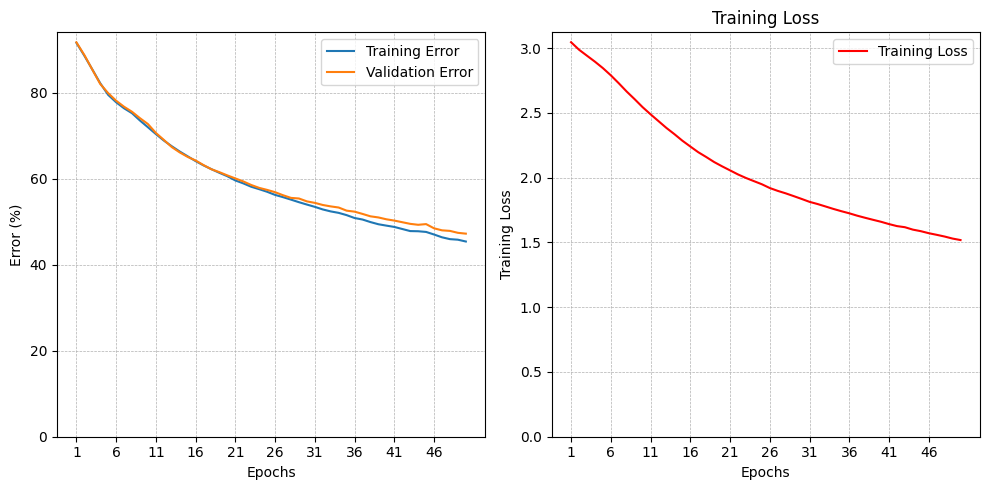

In [7]:
model_init_function = models.untrained_multiclass_1hidden
epochs = 50
learning_rates = [0.001, 0.0001]
batch_sizes = [32, 512, 1024]

min_epochs = 15
stopping_patience = 5
val_batch_size = 1000
val_dl = DataLoader(validation_ds, batch_size=val_batch_size, num_workers=6, prefetch_factor=6, pin_memory=True)

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=6, prefetch_factor=6, pin_memory=True)

        # Initialize the model
        model = model_init_function()
        model = model.to(device)
        model_name = f"{model_init_function.__name__}_lr{lr:.0e}_batch{batch_size}"
        print("\n\n - " + model_name)
        writer = SummaryWriter('logs/'+model_name)

        # Train the model
        train_err, val_err, train_loss = cnn_functions.train_network(model, device, lr, epochs, train_dl, val_dl, writer=writer, min_epochs=min_epochs, stopping_patience=stopping_patience)
        cnn_functions.plot_training_stats(train_err, val_err, train_loss)
        model_name += f"_epochs{len(train_err)}"
        writer.close()
        
        # Save the progress
        torch.save(model.state_dict(), './weights/' + model_name + '.pth')
        stats_dict = {
            'train_err': train_err,
            'val_err': val_err,
            'train_loss': train_loss
        }
        with open('./stats/' + model_name + '.pkl', 'wb') as f:
            pickle.dump(stats_dict, f)

## Confusion matrix

In [11]:
model_init_function = models.untrained_multiclass_1hidden
weights_filename = 'untrained_multiclass_1hidden_lr1e-03_batch32_epochs28.pth'

# Load the model and the test data
model = model_init_function()
model.load_state_dict(torch.load(os.path.join(script_dir, './weights', weights_filename)))
test_batch_size = 1000
test_loader = DataLoader(test_ds, batch_size=test_batch_size, shuffle=True)

Test accuracy: 80.49%


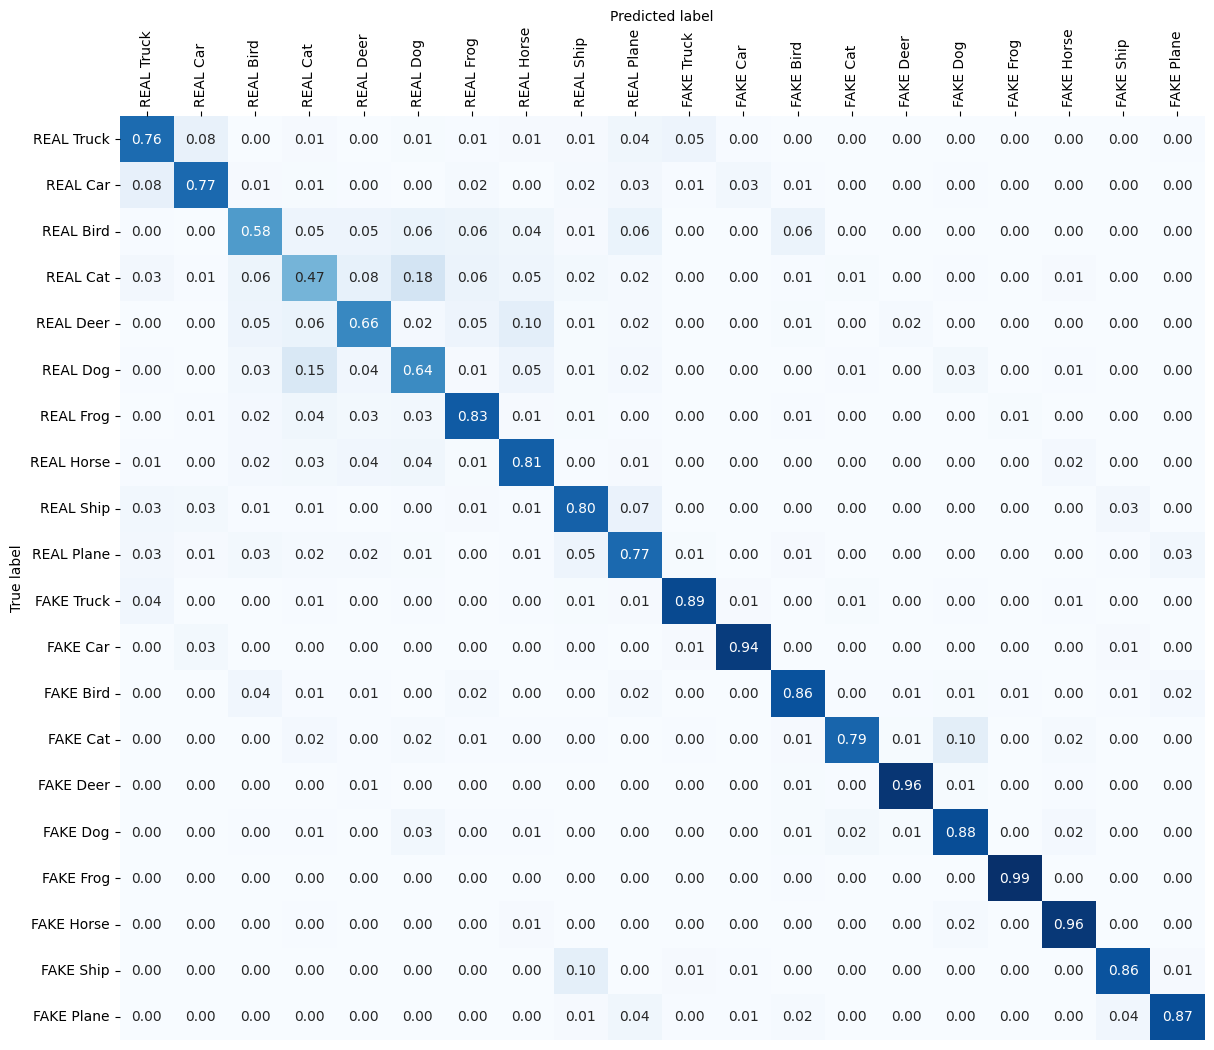

In [12]:
class_names = [labels_map[c] for c in labels_map]
cm_figsize = (14, 12)

# Plot the confusion matrix
confusion_matrix, test_accuracy = cnn_functions.make_confusion_matrix(device, model, test_loader, len(class_names))
print(f'Test accuracy: {test_accuracy*100:.2f}%')
cnn_functions.plot_confusion_matrix(confusion_matrix, class_names, cm_figsize)

In [ ]:
model_init_function = models.untrained_multiclass_1hidden 
model.load_state_dict(torch.load('./weights/untrained_multiclass_1hidden_lr1e-03_batch32_epochs28.pth'))
sample_idx = torch.randint(len(train_ds), size=(1,)).item()

gradcam.plot_gradcam(model, model.layer1, train_ds, labels_map, sample_idx)